In [2]:
import pandas as pd
import numpy as np
from plotnine import *

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score

In [88]:
# from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [4]:
kredki = plt.imread('pencils.jpg')

In [8]:
kredki.shape

(427, 640, 3)

In [10]:
kredki_flat = kredki.reshape(-1, 3)

In [11]:
kredki_flat.shape

(273280, 3)

In [120]:
%%time
ks = range(2, 20)

# sylwetki = []
inercje = []
calinski = []
db_score = []


for k in ks:
    km = KMeans(n_clusters=k, random_state=0).fit(kredki_flat)
#     sylwetki.append(silhouette_score(kredki_flat, km.predict(kredki_flat)))
    inercje.append(km.inertia_)
    calinski.append(calinski_harabasz_score(kredki_flat, km.predict(kredki_flat)))
    db_score.append(davies_bouldin_score(kredki_flat, km.predict(kredki_flat)))

Wall time: 2min 21s


In [114]:
km = KMeans(n_clusters=4, random_state=0).fit(kredki_flat)

In [119]:
%%time
# silhouette_score(kredki_flat, km.predict(kredki_flat))
# adjusted_mutual_info_score(km.labels_, km.predict(kredki_flat))
# calinski_harabasz_score(kredki_flat, km.predict(kredki_flat))
# davies_bouldin_score(kredki_flat, km.predict(kredki_flat))

Wall time: 0 ns


In [121]:
inercje_df = pd.DataFrame({'K': ks,
                           'Inercja': inercje})
calinski_df = pd.DataFrame({'K': ks,
                           'Calinski': calinski})
db_score_df = pd.DataFrame({'K': ks,
                           'db_score': db_score})

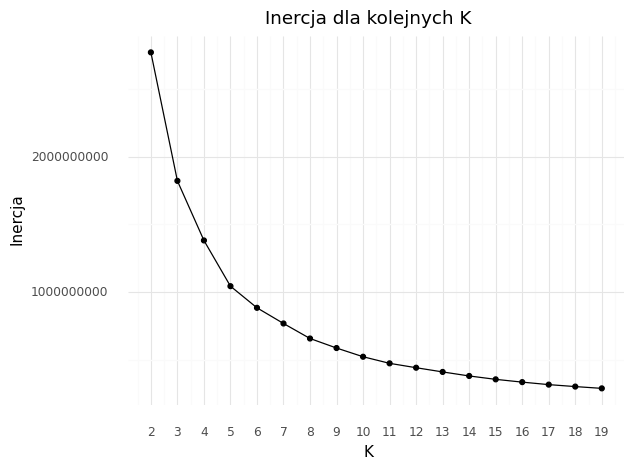

<ggplot: (156813711285)>

In [122]:
(ggplot(inercje_df, aes(x = 'K', y='Inercja'))+
 geom_point() +
 scale_x_continuous(breaks = ks) +
 geom_line() +
 theme_minimal() +
 labs(title= 'Inercja dla kolejnych K'))

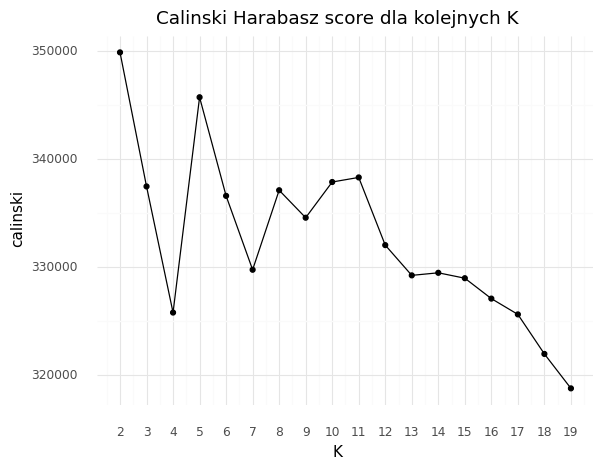

<ggplot: (156814786070)>

In [123]:
(ggplot(calinski_df, aes(x = 'K', y='calinski'))+
 geom_point() +
 scale_x_continuous(breaks = ks) +
 geom_line() +
 theme_minimal() +
 labs(title= 'Calinski Harabasz score dla kolejnych K'))

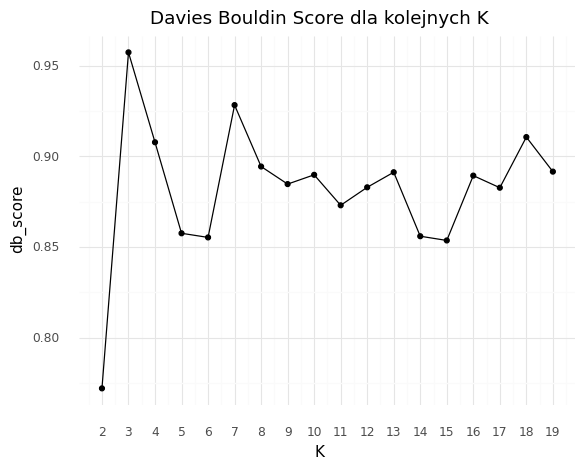

<ggplot: (156808699209)>

In [127]:
(ggplot(db_score_df, aes(x = 'K', y='db_score'))+
 geom_point() +
 scale_x_continuous(breaks = ks) +
 geom_line() +
 theme_minimal() +
 labs(title= 'Davies Bouldin Score dla kolejnych K'))

In [115]:
kredki_flat3 = kredki_flat.copy()
for i in np.unique(km.labels_):
    kredki_flat3[km.labels_ == i, :] = km.cluster_centers_[i]

In [116]:
kredki_test = kredki_flat3.reshape(kredki.shape)

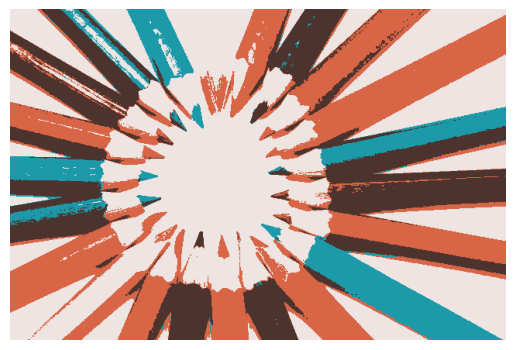

In [129]:
plt.imshow(kredki_test)
plt.axis('off');

### Na podstawie trzech metryk z sklearna, można stwierdzić że cztery grupy (klastry) będą optymalną liczbą do odwzorowania kredek. (3 klastry dla kredek + 1 klaster dla tla na obrazku). Niestety algorytm silhouette jest zbyt skomplikowany do tego typu wyliczeń, ponieważ jego obliczenia trwają bardzo długo.